### CASO FIX PARTNERS CONSULTING
<br>

#### Nombre: JAVIER IGNACIO LOPEZ SANHUEZA

#### PRESENTACIÓN DEL CASO - PARTE 3
Se adjunta la base de datos donde viene las respuestas de los clientes mostrando que tan de acuerdo están con las afirmaciones que le preguntaban y esta se evalúa del 1 al 5, donde 1 es muy en desacuerdo y 5 es muy de acuerdo.

DICCIONARIO:

* D1:  Genero
* D2:	Edad
* D3:	Nacionalidad
* D4:	Residencia
* D5:	Sostenedor economico
* D6:	Ingreso
* D7:	Frecuencia de compra
* D8:	Horario favorito

**PREGUNTAS**
* P01:	la tienda ofrece una buena calidad de productos
* P02:	la tienda ofrece precios atractivos
* P03:	la tienda ofrece una relación precio - calidad superior a la competencia
* P04:	la tienda cuenta con suficiente disponibilidad de tallas en sus tiendas
* P05:	la tienda cuenta con variedad de productos en tiendas
* P06:	la tienda ofrece productos a la moda
* P07:	la tienda ofrece promociones atractivas
* P08:	Ubicación productos es buena
* P09:	Disponibilidad de productos es buena
* P10:	Asistencia en sala de ventas es buena
* P11:	Rapidez filas cajas es buena
* P12:	Promoción de productos es buena
* P13:	Información de precios es buena
* P14:	Limpieza tiendas es buena
* P15:	Atención de cajeras es buena
* P16:	Método de pago son buenos
* P17:	Disponibilidad de cajas para pago es buena
* P18:	Satisfacción evaluacion
* P19:	Recomendación evaluacion
* P20:	Todas nuestras tiendas cuentan con un mismo orden y limpieza
* P21:	Todas nuestras tiendas cuentan con la misma variedad de productos
* P22:	La experiencia brindada por nuestras distintas sucursales, son similares
* P23:	Los productos transmitidos en publicidad la tienda, se encuentran disponibles en tiendas
* P24:	Rapidez en establecer contacto call center
* P25:	Solución del problema es correcta en servicio post venta
* P26:	Amabilidad ejecutivas call center
* P27:	la rapidez en brindar solución en servicio post venta
* P28:	la compensación por problemas es correcta en servicio post venta




### PREGUNTA 1
Explore los datos y resuma en máximo 4 gráficos los hallazgos más importantes es su análisis exploratorio. Incluya filtros y navegación de datos.

In [ ]:
## En caso de no tener las librerias factor_analyzer y las de missingno. 
# Instalar con los siguientes comandos si usa Anaconda

conda install -c conda-forge missingno
conda install -c conda-forge/label/gcc7 missingno
conda install -c conda-forge/label/cf201901 missingno
conda install -c conda-forge/label/cf202003 missingno

conda install -c ets factor_analyzer

# Si desea instalar las librerias por consola se debe usar estos comandos

# pip install factor_analyzer
# pip install missingno

In [25]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, confusion_matrix, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

import factor_analyzer as factor
import missingno as msngo

In [2]:
df = pd.read_csv('DatospruebaFix.csv', sep=';')
df.head()

,D1,D2,D3,D4,D5,D6,D7,D8,P1,P2,...,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28
0,1,2.0,1.0,14,2,1,3.0,3.0,4.0,5,...,4.0,3,2,4.0,4.0,3.0,3,4.0,3,3
1,1,2.0,1.0,7,2,3,4.0,3.0,3.0,2,...,4.0,3,3,2.0,3.0,5.0,3,4.0,3,3
2,1,6.0,1.0,7,2,4,1.0,2.0,2.0,3,...,5.0,3,3,5.0,4.0,2.0,4,4.0,5,2
3,1,5.0,1.0,7,1,3,3.0,3.0,2.0,2,...,5.0,4,4,4.0,2.0,3.0,3,4.0,2,3
4,1,2.0,1.0,3,2,5,3.0,1.0,3.0,3,...,5.0,3,3,4.0,3.0,4.0,4,3.0,3,3


In [3]:
df.shape

(1998, 36)

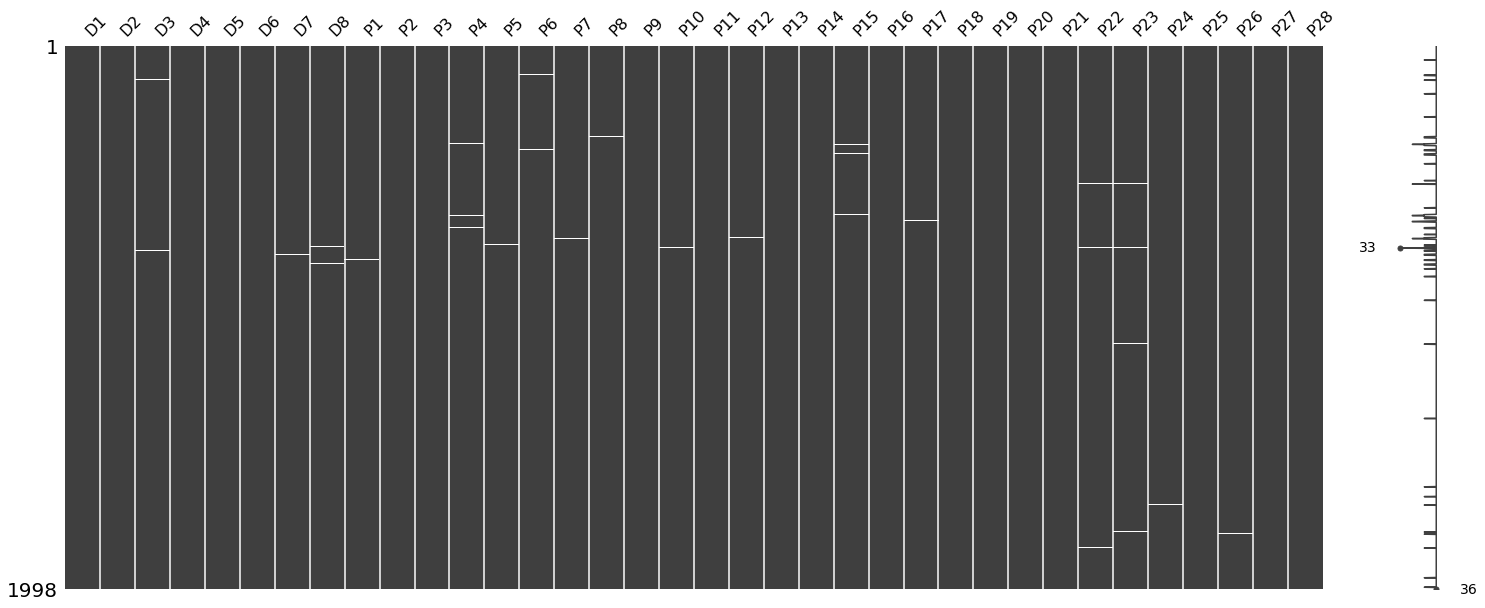

In [4]:
msngo.matrix(df);

In [5]:
#Se observa que el el top 3 de respuestas faltantes son P6, P26, D8 (tercer lugar), P4 (Segundo lugar) y p15 (Primer lugar)
# P6: la tienda ofrece productos a la moda
# P26: Amabilidad ejecutivas call center
# D8: Horario favorito
# P4: la tienda cuenta con suficiente disponibilidad de tallas en sus tiendas
# P15: Atención de cajeras es buena

df.isna().sum().sort_values()

D1      0
P25     0
P21     0
P20     0
P18     0
P16     0
P14     0
P13     0
P11     0
P27     0
P28     0
D6      0
D4      0
P2      0
D5      0
P3      0
P5      1
D2      2
P19     2
P24     3
P10     3
P1      3
P9      3
P7      3
D7      4
P12     4
P17     4
P23     4
P8      5
D3      5
P22     6
P6      7
P26     7
D8      7
P4     13
P15    15
dtype: int64

In [6]:
#Total de datos vacios dentro del dataset.
df.isna().sum().sort_values().sum()

101

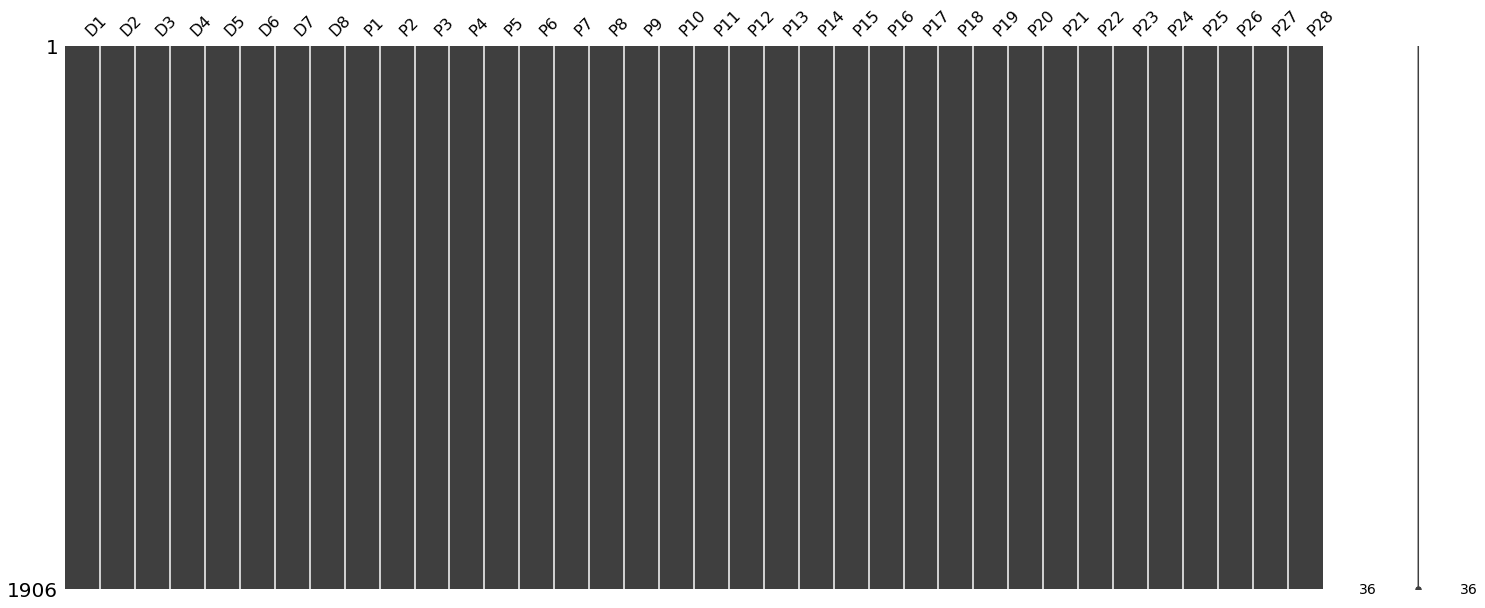

In [7]:
df = df.dropna()
msngo.matrix(df);

In [8]:
# Se procede a eliminar 92 columnas del dataset original
df.shape

(1906, 36)

In [9]:
#Se hace una copia de seguridad de la data limpia.
df1 = df.copy(deep = True)
df1.head()

,D1,D2,D3,D4,D5,D6,D7,D8,P1,P2,...,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28
0,1,2.0,1.0,14,2,1,3.0,3.0,4.0,5,...,4.0,3,2,4.0,4.0,3.0,3,4.0,3,3
1,1,2.0,1.0,7,2,3,4.0,3.0,3.0,2,...,4.0,3,3,2.0,3.0,5.0,3,4.0,3,3
2,1,6.0,1.0,7,2,4,1.0,2.0,2.0,3,...,5.0,3,3,5.0,4.0,2.0,4,4.0,5,2
3,1,5.0,1.0,7,1,3,3.0,3.0,2.0,2,...,5.0,4,4,4.0,2.0,3.0,3,4.0,2,3
4,1,2.0,1.0,3,2,5,3.0,1.0,3.0,3,...,5.0,3,3,4.0,3.0,4.0,4,3.0,3,3


In [10]:
for i in list(df1.columns.values):
    print(f'{i}:{df1[i].unique()}')

D1:[1 2 3]
D2:[2. 6. 5. 3. 4. 1. 7.]
D3:[1. 2.]
D4:[14  7  3  8  6  9 10 13 12  5  4 11  2 16  1 15]
D5:[2 1]
D6:[1 3 4 5 2 6]
D7:[3. 4. 1.]
D8:[3. 2. 1. 4.]
P1:[4. 3. 2. 1.]
P2:[    5     2     3     1 10000]
P3:['4' '3' '2' 'a' '1' 'b']
P4:[2. 3. 1.]
P5:['5' '2' '3' '1' 'a' '2000']
P6:['3' '2' '1' 'b']
P7:[4. 2. 3. 1.]
P8:['5' '3' '4' '2' '1' 'a' '4000000']
P9:['3' '1' '5' '4' '2' 'a']
P10:['5' '3' '4' '2' 'a' '1' '7' '4000' '5000' '-1']
P11:[  5   3   4   2   7   1 500]
P12:[  5.   3.   4.   2.   7.   1.   8. 400.  -3.  -2.  12.]
P13:[   4    3    5    2    7    1 5000]
P14:['5' '4' '3' '2' 'a' '7' '1' '400000']
P15:[ 4.  5.  3.  2.  7.  1. -4. 10.]
P16:[4 5 3 1 2 7]
P17:[3. 2. 1. 4. 5.]
P18:[5 4 3 2 1]
P19:[4. 5. 3. 2. 1.]
P20:[3 4 2 5 1]
P21:[    2     3     4     5     1     9     8 40000]
P22:[4. 2. 5. 3. 1.]
P23:[4. 3. 2. 5. 1.]
P24:[3. 5. 2. 4. 1.]
P25:[3 4 2 5 1]
P26:[4. 3. 2. 5. 1.]
P27:[3 5 2 4 1]
P28:[3 2 4 5 1]


In [11]:
#Reemplazos de elementos\
df1['P2']= df1['P2'].replace(10000,np.nan)
df1['P3']= df1['P3'].replace('a',np.nan)
df1['P3']= df1['P4'].replace('b',np.nan)
df1['P5']= df1['P5'].replace(['a','2000'],[np.nan,np.nan])
df1['P6']= df1['P6'].replace('b',np.nan)
df1['P8']= df1['P8'].replace(['a','4000000'],[np.nan,np.nan])
df1['P9']= df1['P9'].replace('a',np.nan)
df1['P10']= df1['P10'].replace(['a','7','4000','5000','-1'],[np.nan,np.nan,np.nan,np.nan,np.nan])
df1['P11']= df1['P11'].replace([7,500],[np.nan,np.nan])
df1['P12']= df1['P12'].replace([7,8,400,-3,-2,12],[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan])
df1['P13']= df1['P13'].replace([7,5000],[np.nan,np.nan])
df1['P14']= df1['P14'].replace(['a','400000','7'],[np.nan,np.nan,np.nan])
df1['P15']= df1['P15'].replace([7,-4,10],[np.nan,np.nan,np.nan])
df1['P16']= df1['P16'].replace(7,np.nan)
df1['P21']= df1['P21'].replace([9,8,40000],[np.nan,np.nan,np.nan])

In [12]:
#Antes de graficar se debe buscar la naturaleza del dato. Se coteja con el diccionario si las respuestas tienen sentido.
for i in list(df1.columns.values):
    print(f'{i}:{df1[i].unique()}')

df1.info()

D1:[1 2 3]
D2:[2. 6. 5. 3. 4. 1. 7.]
D3:[1. 2.]
D4:[14  7  3  8  6  9 10 13 12  5  4 11  2 16  1 15]
D5:[2 1]
D6:[1 3 4 5 2 6]
D7:[3. 4. 1.]
D8:[3. 2. 1. 4.]
P1:[4. 3. 2. 1.]
P2:[ 5.  2.  3.  1. nan]
P3:[2. 3. 1.]
P4:[2. 3. 1.]
P5:[ 5.  2.  3.  1. nan]
P6:['3' '2' '1' nan]
P7:[4. 2. 3. 1.]
P8:[ 5.  3.  4.  2.  1. nan]
P9:['3' '1' '5' '4' '2' nan]
P10:[ 5.  3.  4.  2. nan  1.]
P11:[ 5.  3.  4.  2. nan  1.]
P12:[ 5.  3.  4.  2. nan  1.]
P13:[ 4.  3.  5.  2. nan  1.]
P14:[ 5.  4.  3.  2. nan  1.]
P15:[ 4.  5.  3.  2. nan  1.]
P16:[ 4.  5.  3.  1.  2. nan]
P17:[3. 2. 1. 4. 5.]
P18:[5 4 3 2 1]
P19:[4. 5. 3. 2. 1.]
P20:[3 4 2 5 1]
P21:[ 2.  3.  4.  5.  1. nan]
P22:[4. 2. 5. 3. 1.]
P23:[4. 3. 2. 5. 1.]
P24:[3. 5. 2. 4. 1.]
P25:[3 4 2 5 1]
P26:[4. 3. 2. 5. 1.]
P27:[3 5 2 4 1]
P28:[3 2 4 5 1]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906 entries, 0 to 1997
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   D1      1906 non-nu

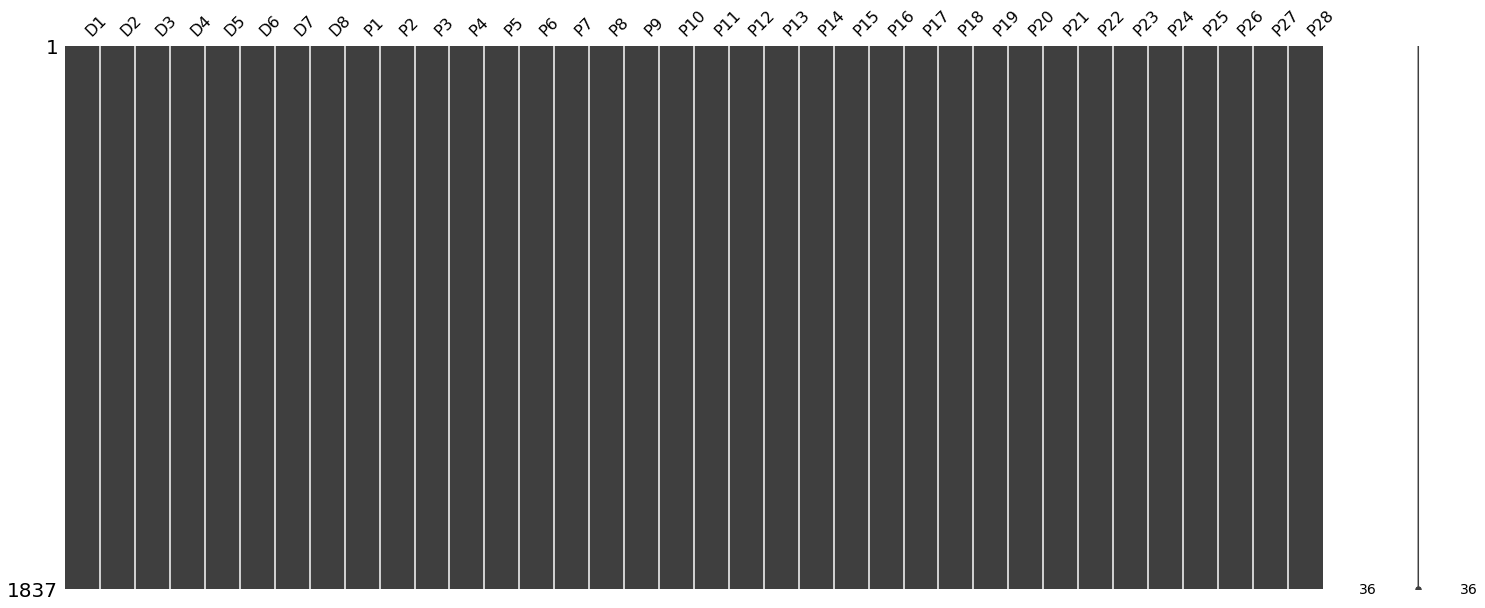

In [13]:
df1 = df1.dropna()
msngo.matrix(df1);

In [14]:
#Se filtran 161 columnas.
1998-1837

161

In [15]:
df1 = df1.apply(pd.to_numeric)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1837 entries, 0 to 1997
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   D1      1837 non-null   int64  
 1   D2      1837 non-null   float64
 2   D3      1837 non-null   float64
 3   D4      1837 non-null   int64  
 4   D5      1837 non-null   int64  
 5   D6      1837 non-null   int64  
 6   D7      1837 non-null   float64
 7   D8      1837 non-null   float64
 8   P1      1837 non-null   float64
 9   P2      1837 non-null   float64
 10  P3      1837 non-null   float64
 11  P4      1837 non-null   float64
 12  P5      1837 non-null   float64
 13  P6      1837 non-null   int64  
 14  P7      1837 non-null   float64
 15  P8      1837 non-null   float64
 16  P9      1837 non-null   int64  
 17  P10     1837 non-null   float64
 18  P11     1837 non-null   float64
 19  P12     1837 non-null   float64
 20  P13     1837 non-null   float64
 21  P14     1837 non-null   float64
 22  

<AxesSubplot:>

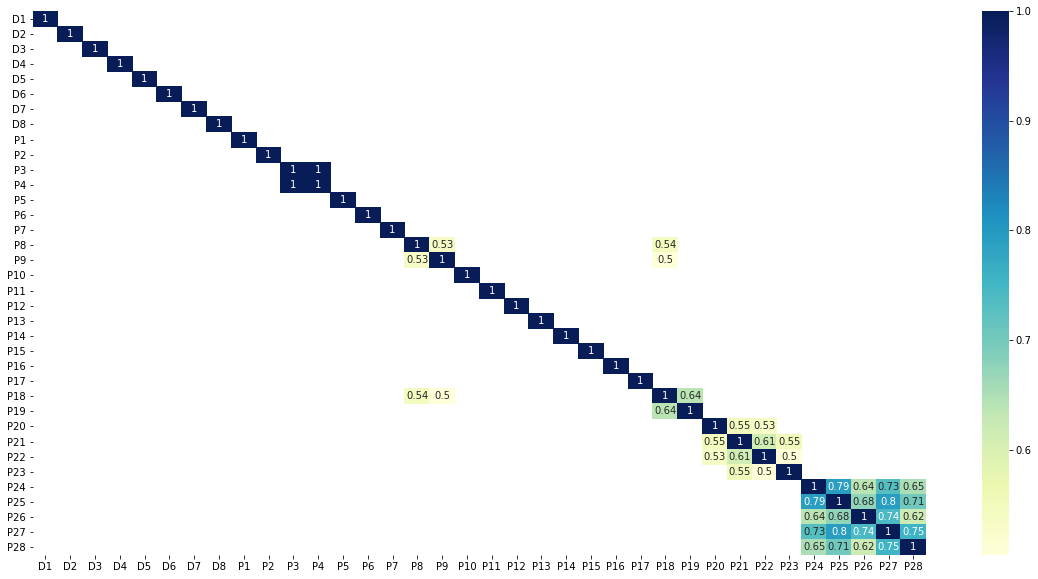

In [17]:
corr_mat = df1.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat[(corr_mat >= 0.49) | (corr_mat <= -0.50)], cmap='YlGnBu', annot = True)

In [18]:
def grafica(df, var, sample_mean = False):
    plt.figure(figsize=(10,3))
    plt.title(f"Gráfico del dataframe para la variable {var}")
    plt.hist(df[var], color='lightgreen', alpha=.5)
    plt.xlabel(f'{var}:{df[var].mean()}')
    plt.ylabel("Frecuencia")
        
    if sample_mean == True:
        plt.axvline(df[var].mean(), lw=2, color='red', linestyle='--')

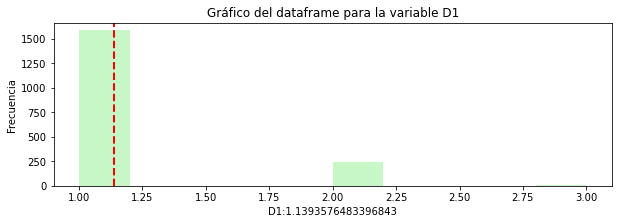

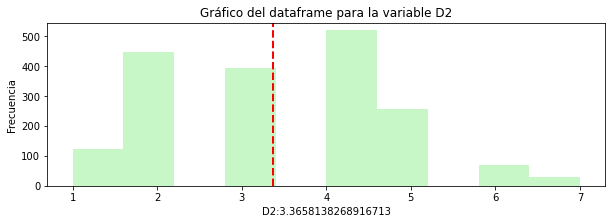

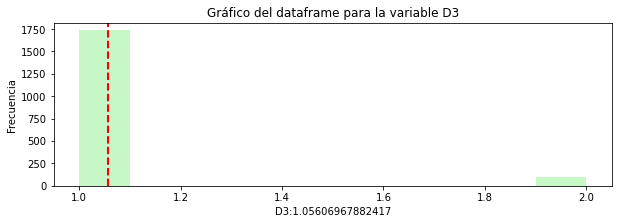

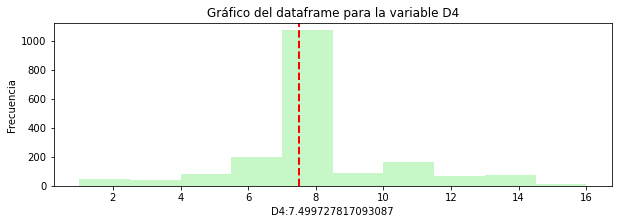

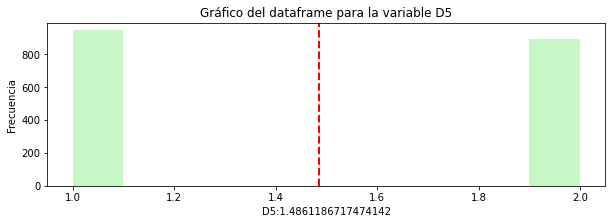

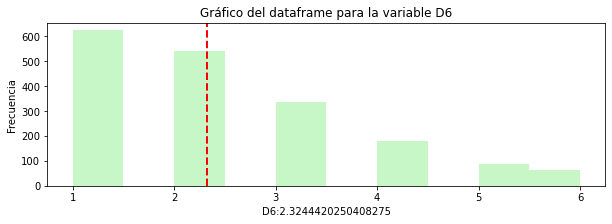

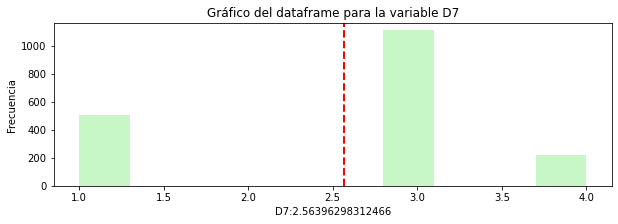

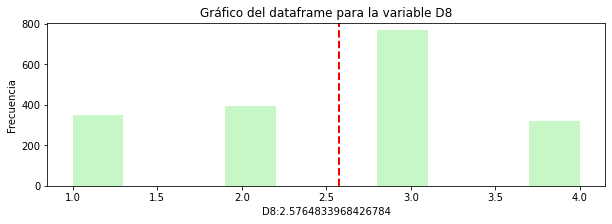

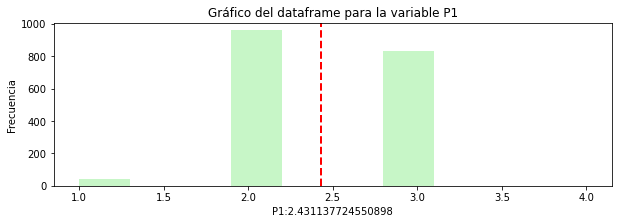

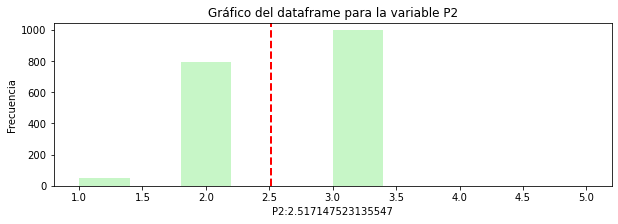

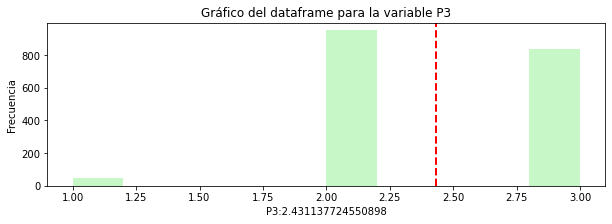

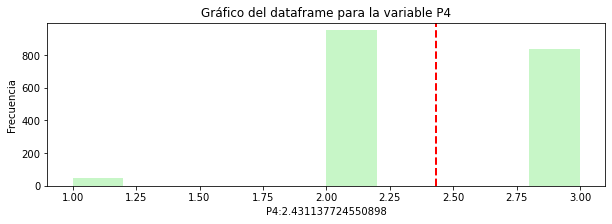

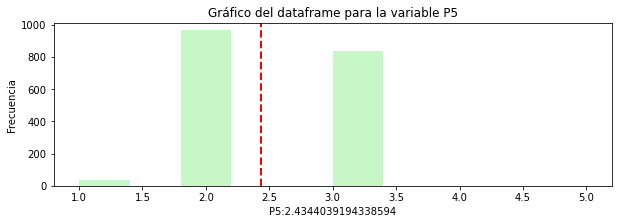

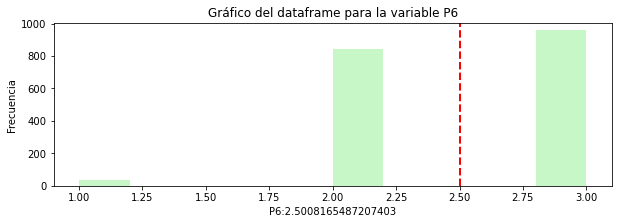

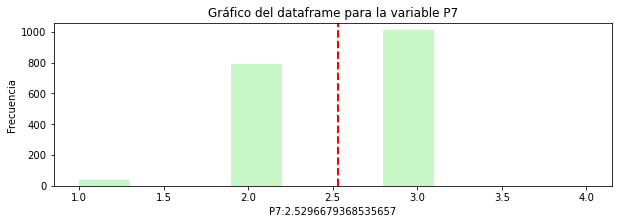

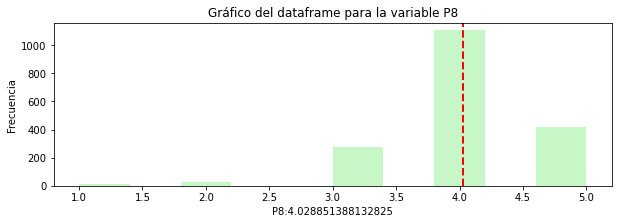

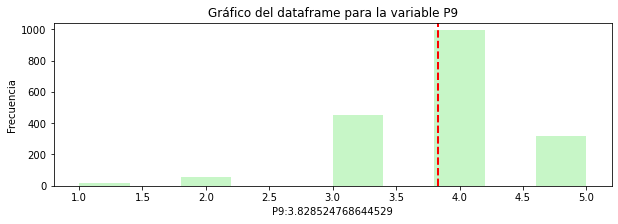

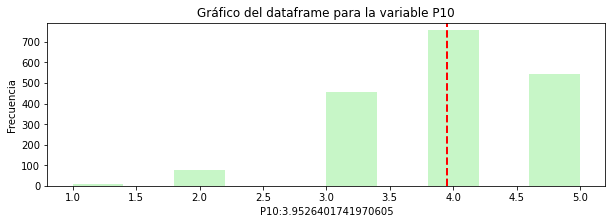

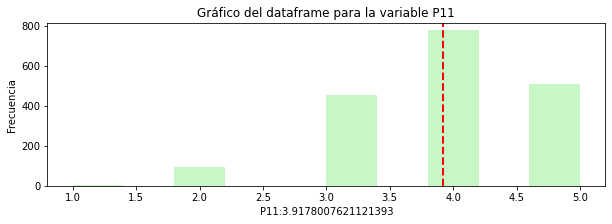

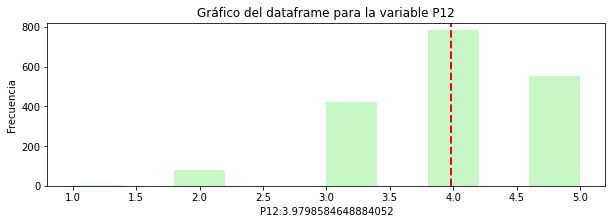

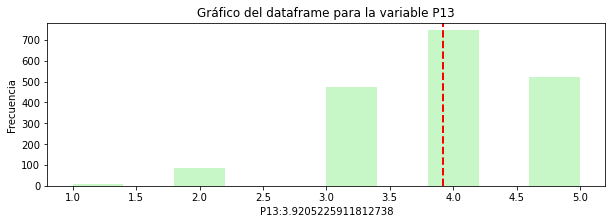

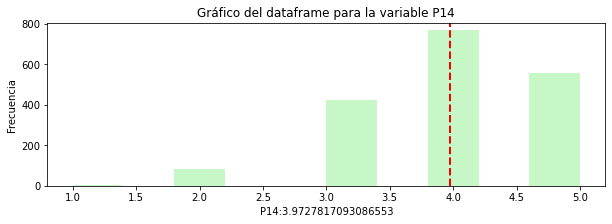

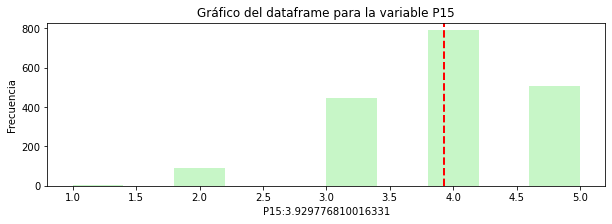

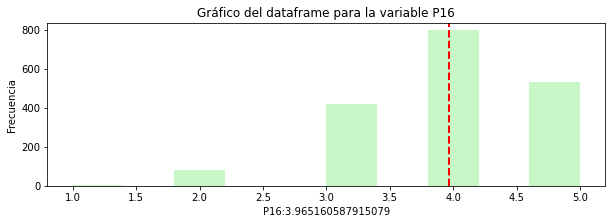

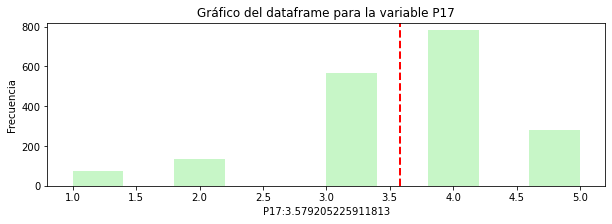

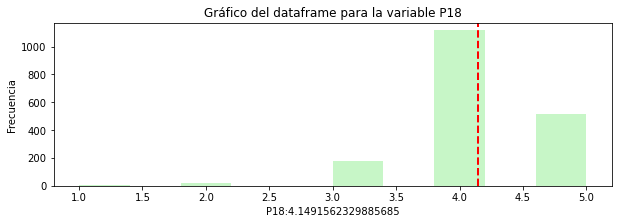

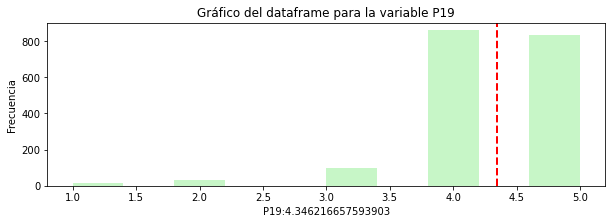

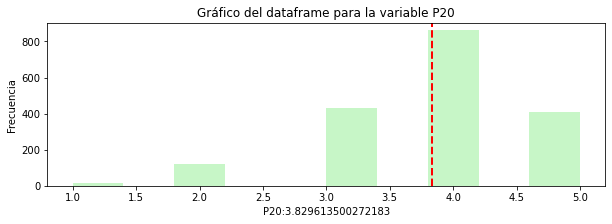

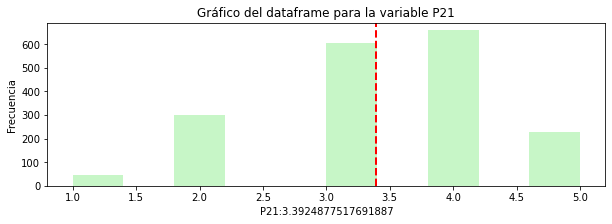

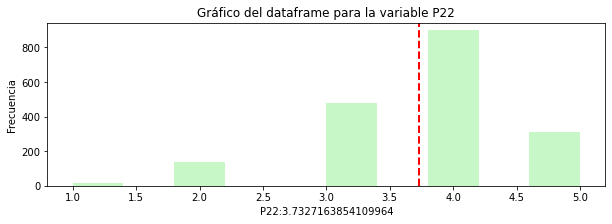

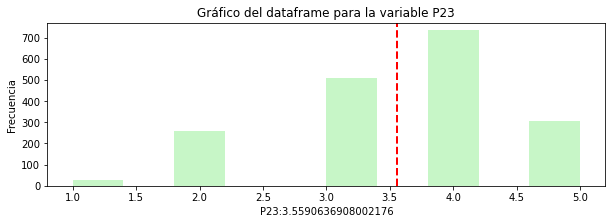

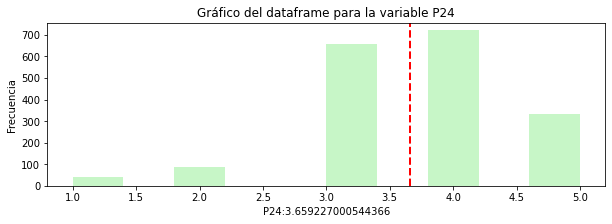

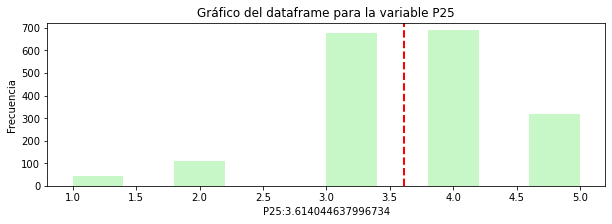

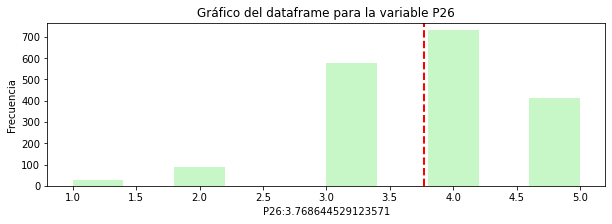

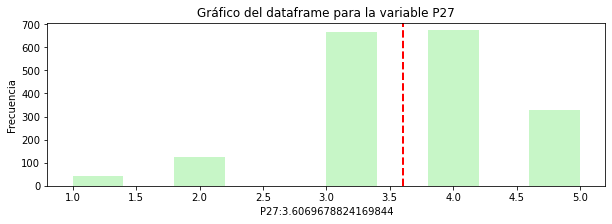

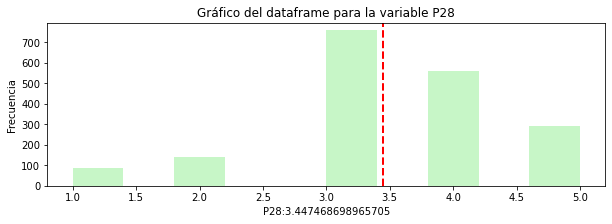

In [19]:
for i in list(df1.columns.values):
    grafica(df1, i , True)

In [20]:
df_quest = df1.drop('D1', axis = 1)
df_quest = df_quest.drop('D2', axis = 1)
df_quest = df_quest.drop('D3', axis = 1)
df_quest = df_quest.drop('D4', axis = 1)
df_quest = df_quest.drop('D5', axis = 1)
df_quest = df_quest.drop('D6', axis = 1)
df_quest = df_quest.drop('D7', axis = 1)
df_quest = df_quest.drop('D8', axis = 1)

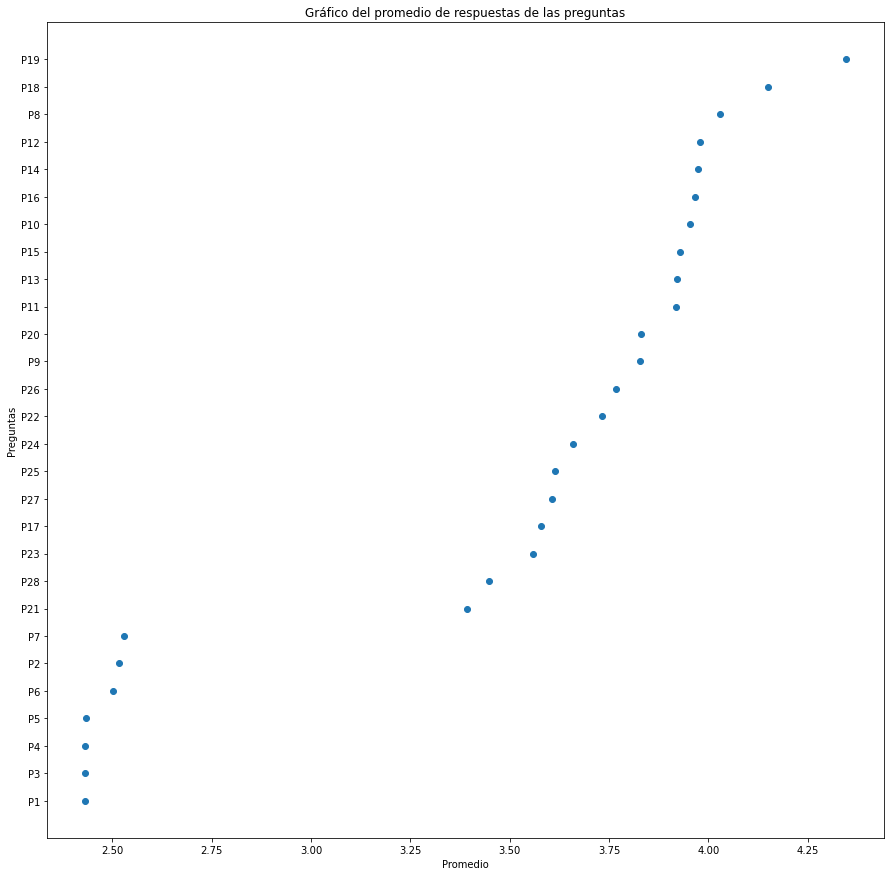

In [21]:
variable = []
mean = []

for i, j in df_quest.iteritems():
    variable.append(i)
    mean.append(j.mean())

df_mean = pd.DataFrame({'var':variable, 'mean': mean}).sort_values(by=['mean'])
plt.figure(figsize=(15,15))
plt.title(f"Gráfico del promedio de respuestas de las preguntas")
plt.xlabel('Promedio')
plt.ylabel("Preguntas")
plt.plot(df_mean['mean'], df_mean['var'],'o')

In [22]:
df_mean.sort_index()

,var,mean
0,P1,2.431138
1,P2,2.517148
2,P3,2.431138
3,P4,2.431138
4,P5,2.434404
5,P6,2.500817
6,P7,2.529668
7,P8,4.028851
8,P9,3.828525
9,P10,3.952640


In [23]:
atributos = ['D1','D2','D3','D4','D5','D6','D7','D8']

df_atr = df1.loc[:,atributos]
print(df_atr.head(2))
df_mean.sort_index()

   D1   D2   D3  D4  D5  D6   D7   D8
0   1  2.0  1.0  14   2   1  3.0  3.0
1   1  2.0  1.0   7   2   3  4.0  3.0


,var,mean
0,P1,2.431138
1,P2,2.517148
2,P3,2.431138
3,P4,2.431138
4,P5,2.434404
5,P6,2.500817
6,P7,2.529668
7,P8,4.028851
8,P9,3.828525
9,P10,3.952640


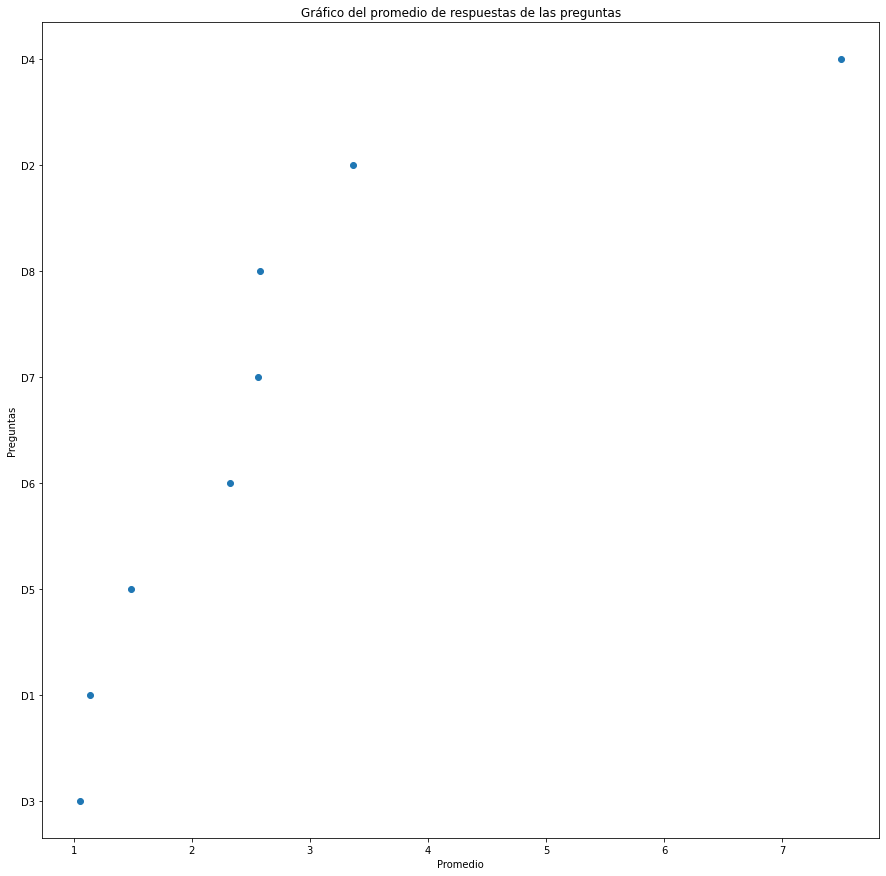

In [24]:
variable = []
mean = []

for i, j in df_atr.iteritems():
    variable.append(i)
    mean.append(j.mean())

df_mean = pd.DataFrame({'var':variable, 'mean': mean}).sort_values(by=['mean'])
plt.figure(figsize=(15,15))
plt.title(f"Gráfico del promedio de respuestas de las preguntas")
plt.xlabel('Promedio')
plt.ylabel("Preguntas")
plt.plot(df_mean['mean'], df_mean['var'],'o')

In [98]:
df1.describe()

,D1,D2,D3,D4,D5,D6,D7,D8,P1,P2,...,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28
count,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,...,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000
mean,1.139358,3.365814,1.056070,7.499728,1.486119,2.324442,2.563963,2.576483,2.431138,2.517148,...,4.346217,3.829614,3.392488,3.732716,3.559064,3.659227,3.614045,3.768645,3.606968,3.447469
std,0.354188,1.348398,0.230119,2.350688,0.499943,1.343635,1.018279,0.988084,0.541592,0.553613,...,0.723029,0.874372,0.982421,0.857418,0.974859,0.903478,0.919220,0.902271,0.934171,1.003312
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,7.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,3.000000,3.000000,2.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
75%,1.000000,4.000000,1.000000,8.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,7.000000,2.000000,16.000000,2.000000,6.000000,4.000000,4.000000,4.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Verbalizacion del procedimiento actual:
- Se procede a cargar el set de datos.
- Se hace analisis de los datos faltantes
- Se procede a eliminar filas de los campos faltantes.
- Se analiza nuevamente, datos que no cumplan con la descripción correcta. Pueden existir datos que si tienen data pero esta errada.
- Se eliminan las columnas de datos (Procedimiento alternativo: Reemplazar con la media de las respuestas. Esto dependerá de lo estricto que se quiera hacer. Por ser un caso en el cual no se tiene contexto ni origen de los datos, se procede a elimnar columna.)
- Se presenta dataset listo para realizar intervenciones. 

In [26]:
factor.calculate_bartlett_sphericity(df_quest)

(157074.84808355616, 0.0)

In [28]:
kmo = factor.calculate_kmo(df_quest)
kmo

(array([0.89801169, 0.8677253 , 0.63328592, 0.63328592, 0.83223423,
        0.89822221, 0.87909117, 0.9480243 , 0.94669265, 0.52341433,
        0.44851791, 0.33538887, 0.39873857, 0.50797746, 0.51740617,
        0.46465674, 0.96816271, 0.92586582, 0.93075917, 0.93717876,
        0.89945503, 0.93647331, 0.93833627, 0.93301933, 0.9154778 ,
        0.95422745, 0.91555328, 0.95087853]),
 0.8943086126446402)

In [31]:
df_quest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1837 entries, 0 to 1997
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P1      1837 non-null   float64
 1   P2      1837 non-null   float64
 2   P3      1837 non-null   float64
 3   P4      1837 non-null   float64
 4   P5      1837 non-null   float64
 5   P6      1837 non-null   int64  
 6   P7      1837 non-null   float64
 7   P8      1837 non-null   float64
 8   P9      1837 non-null   int64  
 9   P10     1837 non-null   float64
 10  P11     1837 non-null   float64
 11  P12     1837 non-null   float64
 12  P13     1837 non-null   float64
 13  P14     1837 non-null   float64
 14  P15     1837 non-null   float64
 15  P16     1837 non-null   float64
 16  P17     1837 non-null   float64
 17  P18     1837 non-null   int64  
 18  P19     1837 non-null   float64
 19  P20     1837 non-null   int64  
 20  P21     1837 non-null   float64
 21  P22     1837 non-null   float64
 22  

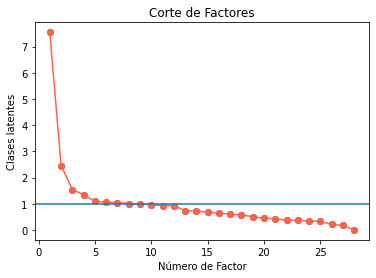

In [59]:
factorize = FactorAnalyzer(rotation='varimax', n_factors=10, method='ml')
# Implementamos el análisis
factorize.fit(df_quest)
# extraemos los eigenvalues
factor_screeplot = factorize.get_eigenvalues()[0]
plt.scatter(range(1,29), factor_screeplot)
plt.plot(range(1,29), factor_screeplot, 'o-', color='tomato')
plt.xlabel('Número de Factor')
plt.ylabel('Clases latentes')
plt.axhline(1)
plt.title("Corte de Factores");

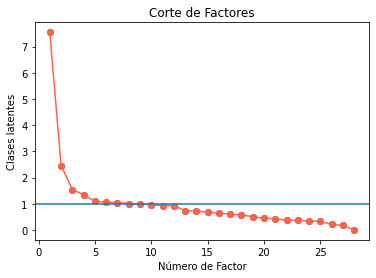

In [72]:
factorize = FactorAnalyzer(rotation='varimax', n_factors=4, method='ml')
# Implementamos el análisis
factorize.fit(df_quest)
# extraemos los eigenvalues
factor_screeplot = factorize.get_eigenvalues()[0]
plt.scatter(range(1,29), factor_screeplot)
plt.plot(range(1,29), factor_screeplot, 'o-', color='tomato')
plt.xlabel('Número de Factor')
plt.ylabel('Clases latentes')
plt.axhline(1)
plt.title("Corte de Factores");

In [73]:
factor_loadings_dataset = pd.DataFrame(factorize.loadings_, columns=['F{}'.format(i) for i in range(1, 4+1)],
                                       index=df_quest.columns)
factor_loadings_dataset['CargaMayor'] = factor_loadings_dataset.idxmax(axis=1)
factor_loadings_dataset = factor_loadings_dataset.sort_values('CargaMayor')
factor_loadings_dataset

,F1,F2,F3,F4,CargaMayor
P14,0.028592,0.023964,-0.026933,0.013702,F1
P26,0.718120,0.307344,0.097347,0.024162,F1
P25,0.840856,0.259944,0.070367,0.034064,F1
P24,0.789613,0.260847,0.075588,0.038519,F1
P16,0.017536,0.014252,-0.000523,-0.037606,F1
P27,0.844467,0.279738,0.087371,0.014852,F1
P11,0.025826,0.014848,-0.025160,-0.040616,F1
P28,0.755385,0.265430,0.056053,0.015123,F1
P9,0.268843,0.572543,0.080136,0.147955,F2
P23,0.273097,0.604130,0.093367,-0.050513,F2


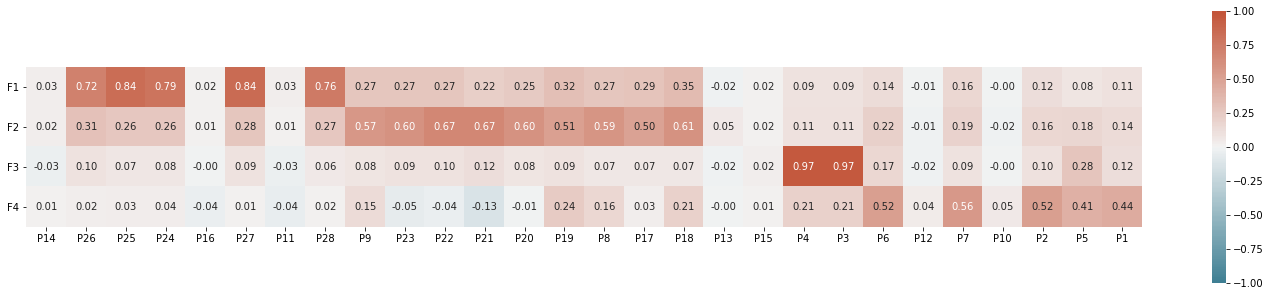

In [74]:
plt.figure(figsize=(25,5))

mapa_de_calor =sns.heatmap(factor_loadings_dataset.drop('CargaMayor', axis=1).T,
                          vmin=-1, vmax=1, center=0,
                          cmap=sns.diverging_palette(220,20, n=200),
                          square=True, annot=True, fmt='.2f')

mapa_de_calor.set_yticklabels(mapa_de_calor.get_yticklabels(),rotation=0);

# Comrey y Lee (1992) sugieren que cargas de: 
# > 71% (50% de varianza superpuesta) se consideran excelentes;
# > 63% (40% de varianza superpuesta) muy bien;
# > 55% (30% de varianza superpuesta) bueno;
# > 45% (20% de varianza superpuesta) regular;
# <32% (10% de varianza superpuesta) deficiente;

In [87]:
factorize.transform(df_quest.values)

y_factor = pd.DataFrame(factorize.transform(df_quest.values), columns=['F{}'.format(i) for i in range(1, 4+1)])

In [88]:
y_factor

,F1,F2,F3,F4
0,-0.589434,0.194125,-1.611219,3.863560
1,0.382424,-1.672861,-0.664019,-0.036185
2,0.068019,-0.126066,-0.865283,0.261450
3,-1.256360,1.044954,0.940124,0.679786
4,-0.228716,-0.237145,0.960428,0.772971
...,...,...,...,...
1832,0.881028,0.152875,1.054160,-0.358676
1833,-1.975786,-1.161483,1.215325,0.841229
1834,-1.061583,0.044415,1.085378,0.432896
1835,0.890350,-0.094019,1.181140,-0.834515


### Sección 3
 Ahora se quiere estudiar como las variables afectan 2 temas de vital importancia, la satisfacción total de los clientes y si estos recomendarían (o no) la tienda visitada. Para cada uno de estos 2 indicadores, corra una regresión que determine que variables son más significativas y explique cómo varían sus resultados respecto a la edad.
#### a. Escoja de manera manual, que variables debe incluir y cuales no a su regresión.
#### b. Concluya en base a los resultados de cada modelo.
<br>

$${y}={{\beta }_{0} + {\beta }_{1} \cdot {genero} + {\beta }_{2} \cdot {edad} + {\beta }_{3} \cdot {nacionalidad} + {\beta }_{4} \cdot {residencia} + {\beta }_{5} \cdot {sostenedor economico} + {\beta }_{6} \cdot {ingreso} + {\beta }_{7} \cdot {frecuencia de compra} + {\beta }_{8} \cdot {Horario favorito} +{\epsilon}_{i}}$$

<br>

In [78]:
df_atr.head(3)

,D1,D2,D3,D4,D5,D6,D7,D8
0,1,2.0,1.0,14,2,1,3.0,3.0
1,1,2.0,1.0,7,2,3,4.0,3.0
2,1,6.0,1.0,7,2,4,1.0,2.0


In [90]:
df_plus_factors = pd.concat([df1.reset_index(), y_factor], axis = 1)

<AxesSubplot:>

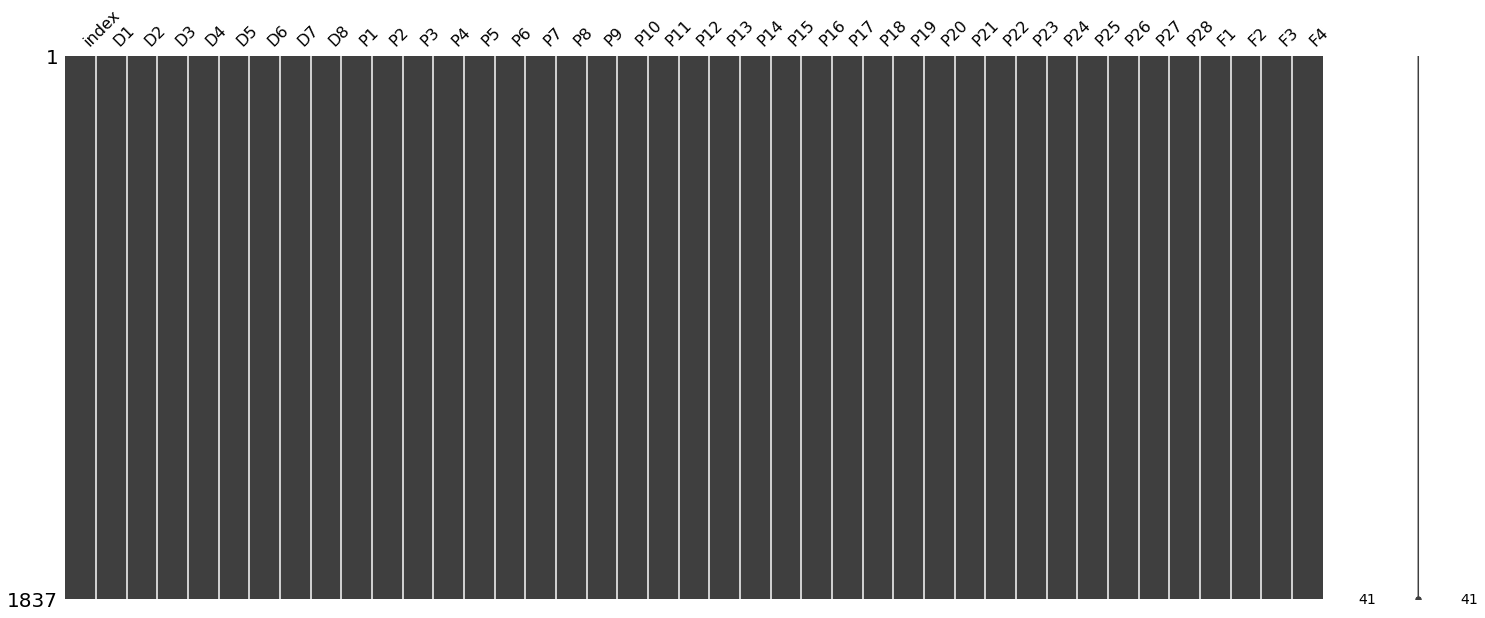

In [91]:
msngo.matrix(df_plus_factors)

In [92]:
df_plus_factors

,index,D1,D2,D3,D4,D5,D6,D7,D8,P1,...,P23,P24,P25,P26,P27,P28,F1,F2,F3,F4
0,0,1,2.0,1.0,14,2,1,3.0,3.0,4.0,...,4.0,3.0,3,4.0,3,3,-0.589434,0.194125,-1.611219,3.863560
1,1,1,2.0,1.0,7,2,3,4.0,3.0,3.0,...,3.0,5.0,3,4.0,3,3,0.382424,-1.672861,-0.664019,-0.036185
2,2,1,6.0,1.0,7,2,4,1.0,2.0,2.0,...,4.0,2.0,4,4.0,5,2,0.068019,-0.126066,-0.865283,0.261450
3,3,1,5.0,1.0,7,1,3,3.0,3.0,2.0,...,2.0,3.0,3,4.0,2,3,-1.256360,1.044954,0.940124,0.679786
4,4,1,2.0,1.0,3,2,5,3.0,1.0,3.0,...,3.0,4.0,4,3.0,3,3,-0.228716,-0.237145,0.960428,0.772971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,1993,1,4.0,1.0,5,1,3,3.0,2.0,3.0,...,4.0,5.0,4,4.0,5,4,0.881028,0.152875,1.054160,-0.358676
1833,1994,1,2.0,1.0,7,2,1,3.0,3.0,3.0,...,3.0,1.0,2,1.0,2,3,-1.975786,-1.161483,1.215325,0.841229
1834,1995,2,2.0,1.0,14,1,1,3.0,3.0,3.0,...,4.0,3.0,4,3.0,2,2,-1.061583,0.044415,1.085378,0.432896
1835,1996,1,3.0,1.0,7,1,3,3.0,4.0,2.0,...,3.0,4.0,4,5.0,5,4,0.890350,-0.094019,1.181140,-0.834515


In [102]:
#Borrar index
df_plus_factors = df_plus_factors.drop('index', axis = 1)

In [103]:
df_atr.columns

Index(['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8'], dtype='object')

In [106]:
def summary(df,x,y):
    model = smf.ols(y +'~' + '+'.join(x),df).fit()
    print(model.summary().tables[1])


for factor in y_factor.columns:
    summary(df_plus_factors,['D2', 'D7'],factor)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6578      0.078      8.413      0.000       0.504       0.811
D2            -0.0921      0.016     -5.806      0.000      -0.123      -0.061
D7            -0.1357      0.021     -6.457      0.000      -0.177      -0.094
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5475      0.075      7.298      0.000       0.400       0.695
D2            -0.0493      0.015     -3.241      0.001      -0.079      -0.019
D7            -0.1488      0.020     -7.381      0.000      -0.188      -0.109
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1263      0.084      1.498      0.1

In [108]:
df_satis = df1.copy(deep = True)
df_recom = df1.copy(deep = True)

## Regresiones

In [112]:
atributos = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28']

X_mat = df1.loc[:,atributos]
X_mat.head(2)

,D1,D2,D3,D4,D5,D6,D7,D8,P1,P2,...,P17,P20,P21,P22,P23,P24,P25,P26,P27,P28
0,1,2.0,1.0,14,2,1,3.0,3.0,4.0,5.0,...,3.0,3,2.0,4.0,4.0,3.0,3,4.0,3,3
1,1,2.0,1.0,7,2,3,4.0,3.0,3.0,2.0,...,2.0,3,3.0,2.0,3.0,5.0,3,4.0,3,3


In [131]:
modelo_1 = smf.ols('P18 ~ D1 + D2 + D3 + D4 + D5 + D6 + D7 + D8 + P1 + P2 + P3 + P4 +P5 + P6 + P7 + P8 + P9 + P10 + P11 + P12 + P13 + P14 + P15 + P16 + P17 + P20 + P21 + P22 + P23 + P24 + P25 + P26 + P27 + P28', df1).fit()
modelo_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    P18   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     52.80
Date:                Thu, 21 Oct 2021   Prob (F-statistic):          4.11e-237
Time:                        00:50:28   Log-Likelihood:                -1223.2
No. Observations:                1837   AIC:                             2514.
Df Residuals:                    1803   BIC:                             2702.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1669      0.203      5.738      0.000       0.768       1.566
D1            -0.0561      0.032     -1.735      0.083      -0.119       0.007
D2            -0.0148      0.010     -1.550      0.121      -0.034       0.004
D3             0.0274      0.049      0.558      0.577      -0.069       0.124
D4             0.0074      0.005      1.541      0.124      -0.002       0.017
D5             0.0445      0.025      1.750      0.080      -0.005       0.094
D6            -0.0101      0.009     -1.163      0.245      -0.027       0.007
D7            -0.0440      0.011     -3.834      0.000      -0.067      -0.021
D8             0.0106      0.011      0.925      0.355      -0.012       0.033
P1             0.0399      0.023      1.733      0.083      -0.005       0.085
P2             0.0225      0.024      0.951      0.342      -0.024       0.069
P3             0.0064      0.012      0.551      0.582      -0.016       0.029
P4             0.0064      0.012      0.551      0.582      -0.016       0.029
P5             0.0187      0.024      0.777      0.437      -0.028       0.066
P6             0.0045      0.025      0.180      0.857      -0.044       0.053
P7             0.0318      0.025      1.262      0.207      -0.018       0.081
P8             0.1941      0.021      9.424      0.000       0.154       0.234
P9             0.1291      0.019      6.978      0.000       0.093       0.165
P10           -0.0042      0.013     -0.324      0.746      -0.030       0.021
P11           -0.0010      0.013     -0.075      0.941      -0.026       0.024
P12            0.0063      0.013      0.474      0.636      -0.020       0.032
P13           -0.0142      0.013     -1.101      0.271      -0.039       0.011
P14            0.0142      0.013      1.096      0.273      -0.011       0.040
P15            0.0002      0.013      0.016      0.987      -0.025       0.026
P16            0.0044      0.013      0.332      0.740      -0.021       0.030
P17            0.1261      0.014      9.139      0.000       0.099       0.153
P20            0.0720      0.017      4.295      0.000       0.039       0.105
P21           -0.0402      0.016     -2.467      0.014      -0.072      -0.008
P22            0.0596      0.018      3.224      0.001       0.023       0.096
P23            0.0384      0.015      2.547      0.011       0.009       0.068
P24            0.0012      0.022      0.056      0.955      -0.041       0.043
P25            0.0229      0.024      0.952      0.341      -0.024       0.070
P26            0.0707      0.019      3.631      0.000       0.033       0.109
P27            0.0214      0.024      0.875      0.382      -0.027       0.069
P28            0.0150      0.018      0.840      0.401      -0.020       0.050
==============================================================================
Om

In [133]:
modelo_satis2 = smf.ols('P18 ~ D2 + D7 + P8 + P9 + P17 + P20 + P21 + P22 + P23 + P26', df1).fit()
modelo_satis2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    P18   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     168.6
Date:                Thu, 21 Oct 2021   Prob (F-statistic):          7.32e-251
Time:                        00:52:32   Log-Likelihood:                -1243.6
No. Observations:                1837   AIC:                             2509.
Df Residuals:                    1826   BIC:                             2570.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5592      0.095     16.489      0.000       1.374       1.745
D2            -0.0310      0.008     -3.689      0.000      -0.047      -0.014
D7            -0.0522      0.011     -4.641      0.000      -0.074      -0.030
P8             0.2120      0.020     10.429      0.000       0.172       0.252
P9             0.1421      0.018      7.843      0.000       0.107       0.178
P17            0.1291      0.014      9.390      0.000       0.102       0.156
P20            0.0784      0.016      4.753      0.000       0.046       0.111
P21           -0.0440      0.016     -2.706      0.007      -0.076      -0.012
P22            0.0644      0.018      3.496      0.000       0.028       0.100
P23            0.0433      0.015      2.894      0.004       0.014       0.073
P26            0.1121      0.015      7.626      0.000       0.083       0.141
==============================================================================
Omnibus:                      378.207   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2843.204
Skew:                          -0.757   Prob(JB):                         0.00
Kurtosis:                       8.904   Cond. No.                         98.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
modelo_recom = smf.ols('P18 ~ D2 + D3 + D4 + D5 + D6 + D7 + D8 + P1 + P2 + P3 + P4 + P5 + P6 + P7 + P8 + P9 + P10 + P11 + P12 + P13 + P14 + P15 + P16 + P17 + P20 + P21 + P22 + P23 + P24 + P25 + P26 + P27 + P28', df1).fit()
modelo_recom.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    P18   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     52.80
Date:                Thu, 21 Oct 2021   Prob (F-statistic):          4.11e-237
Time:                        00:45:41   Log-Likelihood:                -1223.2
No. Observations:                1837   AIC:                             2514.
Df Residuals:                    1803   BIC:                             2702.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1669      0.203      5.738      0.000       0.768       1.566
D1            -0.0561      0.032     -1.735      0.083      -0.119       0.007
D2            -0.0148      0.010     -1.550      0.121      -0.034       0.004
D3             0.0274      0.049      0.558      0.577      -0.069       0.124
D4             0.0074      0.005      1.541      0.124      -0.002       0.017
D5             0.0445      0.025      1.750      0.080      -0.005       0.094
D6            -0.0101      0.009     -1.163      0.245      -0.027       0.007
D7            -0.0440      0.011     -3.834      0.000      -0.067      -0.021
D8             0.0106      0.011      0.925      0.355      -0.012       0.033
P1             0.0399      0.023      1.733      0.083      -0.005       0.085
P2             0.0225      0.024      0.951      0.342      -0.024       0.069
P3             0.0064      0.012      0.551      0.582      -0.016       0.029
P4             0.0064      0.012      0.551      0.582      -0.016       0.029
P5             0.0187      0.024      0.777      0.437      -0.028       0.066
P6             0.0045      0.025      0.180      0.857      -0.044       0.053
P7             0.0318      0.025      1.262      0.207      -0.018       0.081
P8             0.1941      0.021      9.424      0.000       0.154       0.234
P9             0.1291      0.019      6.978      0.000       0.093       0.165
P10           -0.0042      0.013     -0.324      0.746      -0.030       0.021
P11           -0.0010      0.013     -0.075      0.941      -0.026       0.024
P12            0.0063      0.013      0.474      0.636      -0.020       0.032
P13           -0.0142      0.013     -1.101      0.271      -0.039       0.011
P14            0.0142      0.013      1.096      0.273      -0.011       0.040
P15            0.0002      0.013      0.016      0.987      -0.025       0.026
P16            0.0044      0.013      0.332      0.740      -0.021       0.030
P17            0.1261      0.014      9.139      0.000       0.099       0.153
P20            0.0720      0.017      4.295      0.000       0.039       0.105
P21           -0.0402      0.016     -2.467      0.014      -0.072      -0.008
P22            0.0596      0.018      3.224      0.001       0.023       0.096
P23            0.0384      0.015      2.547      0.011       0.009       0.068
P24            0.0012      0.022      0.056      0.955      -0.041       0.043
P25            0.0229      0.024      0.952      0.341      -0.024       0.070
P26            0.0707      0.019      3.631      0.000       0.033       0.109
P27            0.0214      0.024      0.875      0.382      -0.027       0.069
P28            0.0150      0.018      0.840      0.401      -0.020       0.050
==============================================================================
Om

In [135]:
modelo_recom2 = smf.ols('P18 ~ D2 + D7 + P8 + P17 + P20 + P22 + P23 + P26', df1).fit()
modelo_recom2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    P18   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     195.6
Date:                Thu, 21 Oct 2021   Prob (F-statistic):          4.20e-239
Time:                        00:52:47   Log-Likelihood:                -1276.3
No. Observations:                1837   AIC:                             2571.
Df Residuals:                    1828   BIC:                             2620.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7161      0.094     18.228      0.000       1.531       1.901
D2            -0.0302      0.009     -3.546      0.000      -0.047      -0.013
D7            -0.0597      0.011     -5.236      0.000      -0.082      -0.037
P8             0.2636      0.020     13.498      0.000       0.225       0.302
P17            0.1396      0.014     10.048      0.000       0.112       0.167
P20            0.0699      0.016      4.337      0.000       0.038       0.101
P22            0.0605      0.018      3.407      0.001       0.026       0.095
P23            0.0530      0.014      3.703      0.000       0.025       0.081
P26            0.1179      0.015      7.905      0.000       0.089       0.147
==============================================================================
Omnibus:                      414.781   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2861.356
Skew:                          -0.877   Prob(JB):                         0.00
Kurtosis:                       8.857   Cond. No.                         85.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""